In [8]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
#import datetime
import seaborn as sns
import matplotlib.pylab as plt
# 테그 분석 패키지
#from sklearn.feature_extraction.text import CountVectorizer
import pytz
from glob import glob

In [5]:
# dataframe 속에 시간 항목을 datetime 데이터형으로 바꿔서 저장하는 함수
# boolean이 True인 경우 NaN 항목을 데이터프레임에서 삭제
seoultz = pytz.timezone('Asia/Seoul')

# 각 포스트 당 테그 수를 합산하여 테그수 열을 추가하는 함수
def num_tags(df_name):
    count = 0
    df_name['number of tags'] = np.zeros_like(df_name['uid'])
    
    for i, dtitem in enumerate(df_name['tags']):
        try:
            df_name['number of tags'][i] = dtitem.count('#')
        except:
            if str(dtitem).lower() == 'nan':
                df_name['number of tags'][i] = 0
            else:
                count += 1
    
    if count:
        print('Number of fails: %s'%count)
    else:
        print('success')

# tags 중 tag_name 언급 횟수를 기록하여 col_name 열을 추가하는 함수
def suyo_tags(df_name, tag_name, col_name):
    count = 0
    df_name[col_name] = np.zeros_like(df_name['uid'])
    
    for i, dtitem in enumerate(df_name['tags']):
        try:
            df_name[col_name][i] = dtitem.count(tag_name)
        except:
            if str(dtitem).lower() == 'nan':
                df_name[col_name][i] = 0
            else:
                count += 1
    
    if count:
        print("Number of fails: %s"%count)
        
# str 속성을 가진 정수를 int 속성으로 바꾸는 함수
def int_maker(df_name, col_name):
    count = 0
    
    for i, dtitem in enumerate(df_name[col_name]):
        try:
            df_name[col_name][i] = int(dtitem.replace(',', ''))
        except:
            if str(dtitem).lower() == 'nan':
                df_name[col_name][i] = int(0)
            else:
                count += 1
    
    if count:
        print("Number of fails: %s"%count)
        
# 같은 열 데이터 중 다른 데이터형이 있는지 확인하는 함수
# 단, datetime 형은 출력 안됨
def type_tester(df_name, col_name, tp):
    count = 0
    
    for dtitem in df_name[col_name]:
        if type(dtitem) != tp:
            count += 1
    
    if count:
        print("Number of different types: %s"%count)        
       

# 테그 : 빈도수 사전 리턴
def tag_analyze(df_name):
    test_list = []
    for item in df_name['tags']:
        if type(item) == str:
            test_list.append(item)
            #print(item)

    vect = CountVectorizer()
    vect.fit(test_list)
    voc_dic = vect.vocabulary_.items()
    voc_len = len(vect.transform(test_list).toarray()[0])
    number = np.zeros(voc_len)

    for np_item in vect.transform(test_list).toarray():
        number += np_item

    new_dic = {}
    for key, val in voc_dic:
        new_dic[key] = number[val]
    return new_dic

# 데이터프레임에 테그 리스트 열 추가
def add_tag_list(df_name):
    df_name['tag list'] = np.zeros_like(df_name['uid'])
    for i, t_item in enumerate(df_name['tags']):
        try:
            df_name['tag list'][i] = t_item.split('#')[1:]
            #print(t_item.split('#')[1:])
        except:
            df_name['tag list'][i] = []


In [6]:
jname = '''
["coochullo", 
"csdinoa", 
"downtwnr", 
"gpaki", 
"hadonggwang", 
"iamburger", 
"ichie", 
"jinjin", 
"jinospizza", 
"lehoi",
"modak",
"monro",
"pildong",
"soiyn",
"sushi",
"uijeongbu"
]'''

In [9]:
# 수요미식회 방송날짜 사전 (상호명: 방송일자(datetime형))
bc_time = {}
bc_time['downtwnr'] = parse('2017.05.24')
bc_time['csdinoa'] = parse('2017.01.11')
bc_time['uijeongbu'] = parse('2017.01.11')
bc_time['sushi'] = parse('2016.12.14')
bc_time['hadonggwang'] = parse('2016.11.16')
bc_time['soiyn'] = parse('2016.09.28')
bc_time['lehoi'] = parse('2016.09.28')
bc_time['coochullo'] = parse('2016.09.21')
bc_time['jinospizza'] = parse('2016.08.10')
bc_time['modak'] = parse('2016.06.29')
bc_time['pildong'] = parse('2016.06.01')
bc_time['ichie'] = parse('2016.03.23')
bc_time['gpaki'] = parse('2016.03.23')
bc_time['monro'] = parse('2016.01.20')
bc_time['iamburger'] = parse('2015.05.13')
bc_time['jinjin'] = parse('2016.03.16')

In [10]:
# csv파일이 저장된 파일경로
path = 'C:/Anaconda2/bin/dataset/file'

In [13]:
df = pd.read_csv('insta_final.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,datetime,likes,location,tags,comments,week,hour
0,2016-07-07 19:12:45,88,shindle,#찬이맛집,<user1>$부추밑에 깔려있는 두루치기. 제육볶음 아님. 주물럭아님. #찬이맛집,3.0,19.0
1,2017-02-18 14:38:16,38,shindle,#수요미식회#제육볶음,<user1>$전래 맛있 제육쓰 #수요미식회#제육볶음<user2>$차암나..그록케 ...,5.0,14.0
2,2016-10-03 22:10:32,61,shindle,#수요미식회맛집#제육볶음#신들래보쌈#냄비밥#먹스타그램,<user1>$냄비밥에 자작한 제육볶음 올려서#수요미식회맛집 #제육볶음#신들래보쌈 ...,0.0,22.0
3,2017-02-27 03:19:29,46,shindle,#월욜미식회#신들래보쌈,<user1>$일하기전 반주 🎹 #월욜미식회 #신들래보쌈<user2>$나도<use...,0.0,3.0
4,2017-04-07 03:04:55,43,shindle,#제육볶음#수요미식회#신들레보쌈#숙대입구#남영역,<user1>$#제육볶음 #수요미식회 #신들레보쌈 #숙대입구 #남영역_들기름맛이 잘...,4.0,3.0


In [8]:
# datetime 항목 값을 datetime 데이터형으로 바꾸고 nan 값 삭제하기
for i, dt in enumerate(data_dic.values()):
    time_maker(dt, True)
    print(data_dic.keys()[i], i)

success
(u'sushi', 0)
success
(u'ichie', 1)
success
(u'lehoi', 2)
success
(u'uijeongbu', 3)


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


success
(u'csdinoa', 4)
success
(u'pildong', 5)
success
(u'jinospizza', 6)
success
(u'jinjin', 7)
success
(u'modak', 8)
success
(u'downtwnr', 9)
success
(u'soiyn', 10)
success
(u'coochullo', 11)
success
(u'monro', 12)
success
(u'gpaki', 13)
success
(u'hadonggwang', 14)
success
(u'iamburger', 15)


In [9]:
t = data_dic['ichie']['datetime'][0]
t

datetime.datetime(2017, 6, 10, 21, 56, 27, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [11]:
t.hour

21

In [36]:
data_dic['ichie']['datetime'][0]

'2017-06-10T12:56:27.000Z'

In [41]:
for dt in (data_dic.values()):
    hour_maker(dt)

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
for dt in (data_dic.values()):
    week_maker(dt)

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
jin = data_dic['jinjin']

In [16]:
pidf = data_dic['jinospizza'].pivot_table(index='weekday', columns='hour', aggfunc='size')
pidf

hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,99
weekday,,,,,,,,,,,,,,,,,,,,,
0,18.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,...,6.0,6.0,7.0,7.0,10.0,8.0,6.0,10.0,4.0,NaN
1,3.0,3.0,2.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,4.0,8.0,14.0,17.0,23.0,32.0,21.0,21.0,6.0,NaN
2,8.0,3.0,1.0,1.0,1.0,NaN,5.0,2.0,3.0,4.0,...,11.0,7.0,14.0,13.0,17.0,25.0,28.0,24.0,18.0,NaN
3,14.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,...,10.0,10.0,13.0,16.0,24.0,24.0,25.0,19.0,16.0,NaN
4,12.0,11.0,5.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,...,17.0,6.0,12.0,24.0,33.0,39.0,27.0,22.0,15.0,NaN
5,12.0,6.0,3.0,2.0,NaN,NaN,1.0,1.0,3.0,1.0,...,25.0,19.0,14.0,26.0,25.0,34.0,31.0,20.0,22.0,NaN
6,12.0,9.0,2.0,5.0,NaN,1.0,5.0,1.0,1.0,3.0,...,22.0,14.0,19.0,37.0,39.0,39.0,29.0,35.0,17.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.0


### 요일이 0(월요일)이고 시간이 0시인 게시글 수 출력

In [17]:
data = data_dic['jinospizza']
c = 0
a = []
for i in range(len(data['uid'])):
    try:
        if (int(data['hour'][i]) == 0) & (int(data['weekday'][i]) == 0):
            print(data['datetime'][i], data['datetime'][i].weekday(), data['datetime'][i].hour)
            a.append(data['tags'][i].split('#'))
            c += 1
        else:
            pass
    except:
        pass
print(c)

(datetime.datetime(2017, 6, 5, 0, 36, 56, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 5, 15, 0, 30, 39, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 4, 3, 0, 38, 58, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 3, 27, 0, 11, 16, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 3, 20, 0, 7, 32, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 3, 20, 0, 3, 17, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 3, 13, 0, 34, 42, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 3, 6, 0, 55, 16, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 2, 6, 0, 39, 39, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime(2017, 2, 6, 0, 38, 4, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>), 0, 0)
(datetime.datetime

In [14]:
# 월요일, 0시 테그 출력
print(a[0])

['', '\xec\xa7\x80\xeb\x85\xb8\xec\x8a\xa4\xed\x94\xbc\xec\x9e\x90', '\xeb\xb8\x8c\xeb\xa3\xa8\xed\x81\xb4\xeb\xa6\xb0\xec\x8a\xa4\xeb\xb2\xa0\xec\x8a\xa4\xed\x8a\xb8', 'ginospizza', 'brooklynsbest', '\xec\x9d\xb4\xed\x83\x9c\xec\x9b\x90\xeb\xa7\x9b\xec\xa7\x91', '\xed\x94\xbc\xec\x9e\x90\xeb\xa7\x9b\xec\xa7\x91', '\xec\x88\x98\xec\x9a\x94\xeb\xaf\xb8\xec\x8b\x9d\xed\x9a\x8c\xed\x94\xbc\xec\x9e\x90', '\xec\x88\x98\xec\x9a\x94\xeb\xaf\xb8\xec\x8b\x9d\xed\x9a\x8c']


In [21]:
len(pdt)

7

sushi


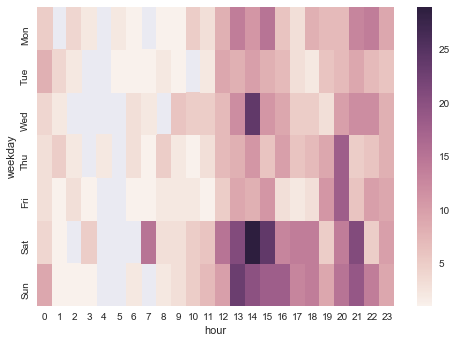

ichie


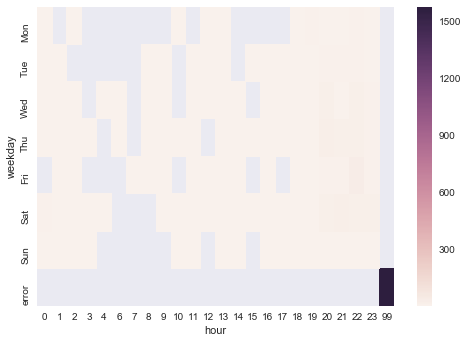

lehoi


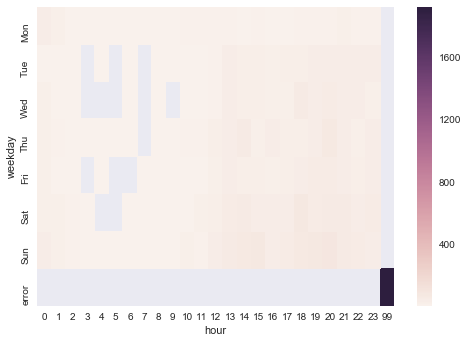

uijeongbu


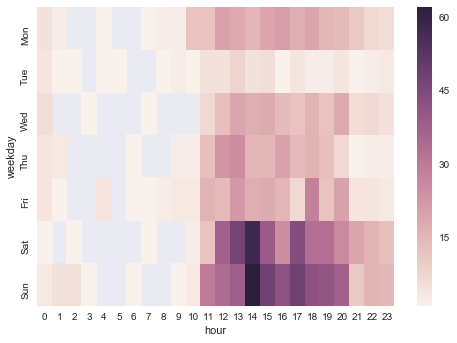

csdinoa


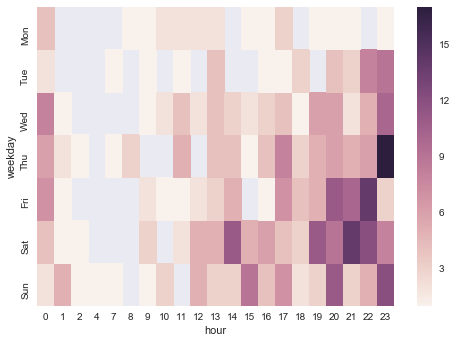

pildong


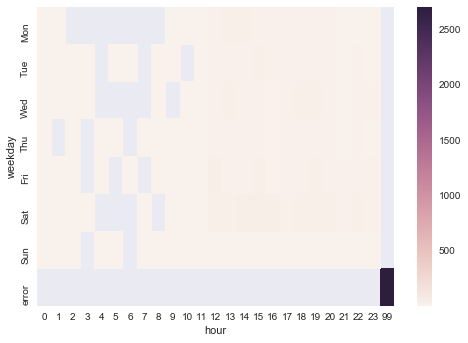

jinospizza


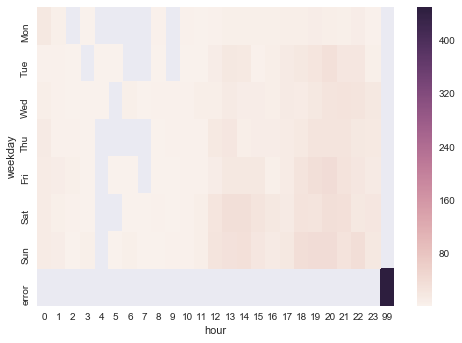

jinjin


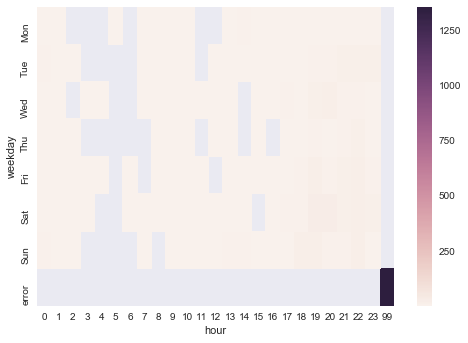

modak


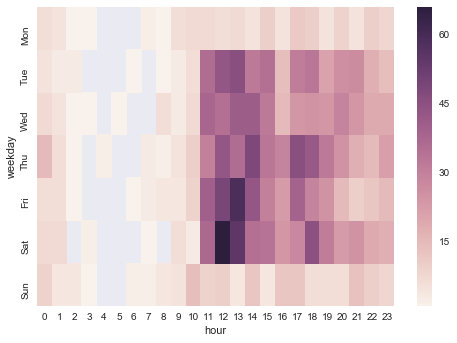

downtwnr


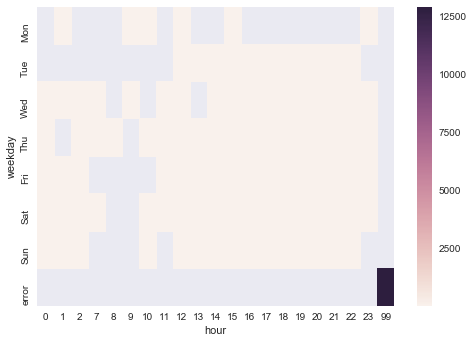

soiyn


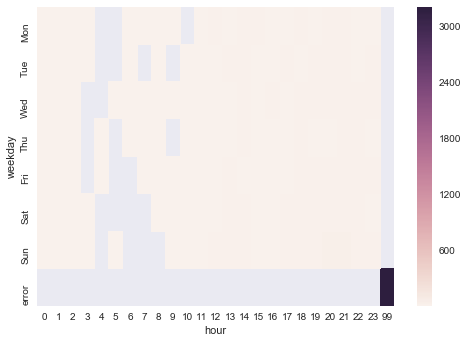

coochullo


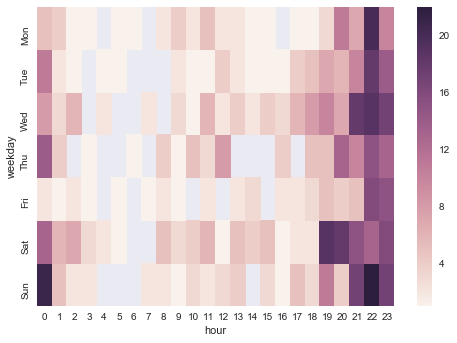

monro


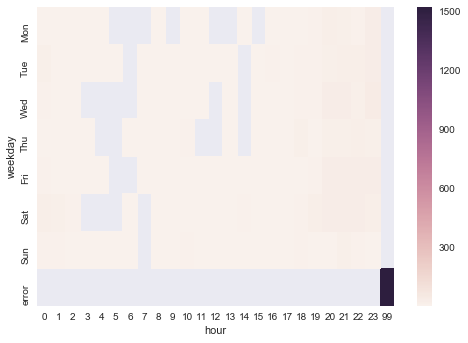

gpaki


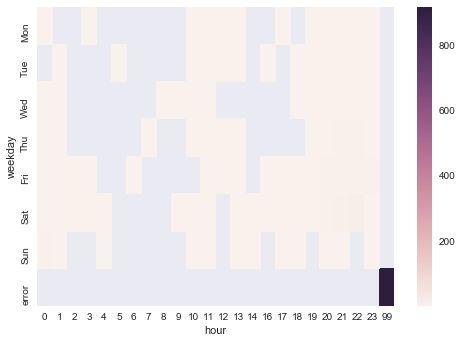

hadonggwang


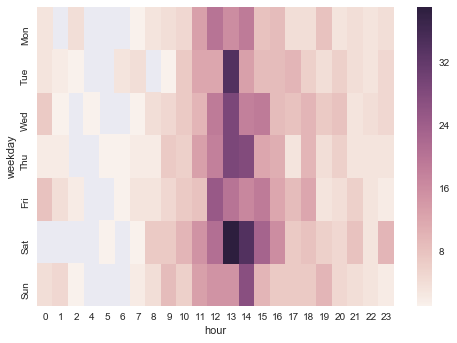

iamburger


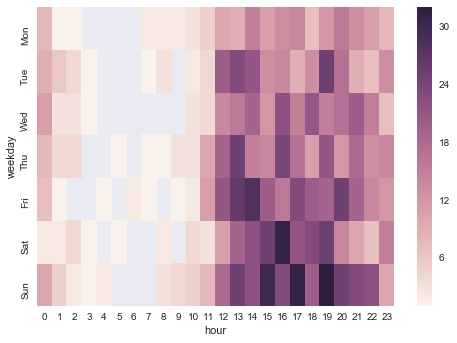

In [24]:
# 모든 csv파일의 요일/시간 게시글수 heatmap 출력
for key, dt in data_dic.items():
    pdt = dt.pivot_table(index='weekday', columns='hour', aggfunc='size')
    print(key)
    if len(pdt) == 7:
        sns.heatmap(pdt, yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    else:
        sns.heatmap(pdt, yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'error'])
    plt.show()

In [25]:
data_dic['jinjin']

,uid,datetime,likes,location,account,tags,comments,hour,weekday
0,BVJDrTXnoW-,2017-06-10 11:00:49+09:00,"1,387",557502184$진진 - 津津,lets_eat_at_here,#그동안고마웠어스리즈#서교동#진진#회원가#왕육성쉐프#평생회원#맛스타그램#서울맛집#서...,<^lets_eat_at_here>$.#그동안고마웠어스리즈 17.#서교동 #진진.개...,11,5
1,BVG96a9guDX,2017-06-09 15:31:58+09:00,225,557502184$진진 - 津津,anhyol_,#임산부일상#서교동#진진#먹스타그램,<^anhyol_>$#임산부일상하루종일 먹고 자고 먹고 뒹굴고😂.#서교동 #진진#...,15,4
2,BJxKVdKAVhu,2016-08-31 18:31:53+09:00,0,557502184$진진 - 津津,tonyhong1004,#진진,<^tonyhong1004>$서교동 최고맛집 중 하나 #진진 사부님 넘 맛있게먹...,18,2
3,BVFOu36h1Fh,2017-06-08 23:20:27+09:00,112,557502184$진진 - 津津,nanchung_tattoo,#테이스티로드#중화요리#칭찡우럭#멘보샤#깐풍기,<^nanchung_tattoo>$테이스티로드 -진진- 칭찡우럭/멘보샤/깐풍기#테이...,23,3
4,BT_on41AMug,2017-05-12 22:39:52+09:00,136,557502184$진진 - 津津,editor_ha,#진진#어향가지#야근후#금요먹방,<^editor_ha>$회원가입 기념으로 이틀 연속 진진 방문. 가지 사랑해요. 어...,22,4
5,BSyKzp-hVVs,2017-04-12 20:37:48+09:00,202,557502184$진진 - 津津,heytae301,NaN,<^heytae301>$이얼즈어고와 가까운 이웃이자 1층에 위치한 진진. 이 집 멘...,20,2
6,BU9xLDeAa6A,2017-06-06 01:47:29+09:00,171,557502184$진진 - 津津,im.d.h,#중화요리#중국집#진진,<^im.d.h>$두번세번 먹어야할 집....#중화요리#중국집#진진<^8sillyi...,1,1
7,5J24fDTNr6,2015-07-15 19:49:13+09:00,601,557502184$진진 - 津津,standingegg2,#수요폭식회#연남동맛집#진진,<^standingegg2>$낮에 예고했었던 '수요 폭식회' 의 첫번째 모임은 중식...,19,2
8,9F7Q6JHITZ,2015-10-21 17:16:07+09:00,"8,460",557502184$진진 - 津津,theconando,#conandoshowpic,<^theconando>$📷• พยายามไปสิ • 55555#conandosh...,17,2
9,BVMWPf4AYjr,2017-06-11 17:40:46+09:00,2,557502184$진진 - 津津,leewangho,#23,<^leewangho>$2017 Mission맛집Tour #23 진진미슐랭 1스타에...,17,6


In [8]:
# Check total number of each columns for each locations(dataframes)
for i, dt in enumerate(data_dic):
    print(dt)
    print(data_dic[dt].count())

sushi
uid         1068
datetime    1068
likes       1068
location    1068
account     1068
tags         927
comments    1054
dtype: int64
ichie
uid         2148
datetime    2146
likes       2148
location    2146
account     2146
tags        1860
comments    2129
dtype: int64
lehoi
uid         5423
datetime    5421
likes       5423
location    5421
account     5421
tags        4493
comments    5325
dtype: int64
uijeongbu
uid         1718
datetime    1718
likes       1718
location    1718
account     1718
tags        1404
comments    1706
dtype: int64
csdinoa
uid         468
datetime    468
likes       468
location    468
account     468
tags        409
comments    464
dtype: int64
pildong
uid         4204
datetime    4203
likes       4204
location    4203
account     4203
tags        3277
comments    4151
dtype: int64
jinospizza
uid         2243
datetime    2242
likes       2243
location    2242
account     2242
tags        1888
comments    2211
dtype: int64
jinjin
uid         2100
date

In [9]:
for dt in data_dic['pildong']['datetime']:
    if type(dt) == int:
        pritn('int')
    elif type(dt) == float:
        print('float')
        print(dt)
    #else:
        #print(type(dt))
print(len(data_dic['pildong']['datetime'])) 
print(len(data_dic['pildong']['uid']))

float
nan
4204
4204


In [156]:
data_dic['pildong']['datetime']

0       2017-06-10 00:08:21+09:00
1       2017-06-07 13:29:22+09:00
2       2017-06-10 18:05:11+09:00
3       2017-06-05 15:29:24+09:00
4       2017-06-10 22:20:08+09:00
5       2017-06-06 21:47:45+09:00
6       2017-06-09 22:46:10+09:00
7       2017-06-09 23:54:27+09:00
8       2017-06-09 19:18:27+09:00
9       2017-06-10 21:56:31+09:00
10      2017-06-10 20:09:41+09:00
11      2017-06-10 20:07:13+09:00
12      2017-06-10 19:29:28+09:00
13      2017-06-10 19:22:46+09:00
14      2017-06-10 16:28:56+09:00
15      2017-06-10 15:59:25+09:00
16      2017-06-10 15:53:47+09:00
17      2017-06-10 15:47:33+09:00
18      2017-06-10 15:27:43+09:00
19      2017-06-10 14:55:08+09:00
20      2017-06-10 13:29:43+09:00
21      2017-06-10 13:11:20+09:00
22      2017-06-10 12:18:33+09:00
23      2017-06-10 12:02:04+09:00
24      2017-06-10 07:30:53+09:00
25      2017-06-09 23:55:51+09:00
26      2017-06-09 23:44:33+09:00
27      2017-06-09 21:34:02+09:00
28      2017-06-09 21:29:34+09:00
29      2017-0

In [13]:
# 테그에서 수요미식회 언급 횟수 열 추가
for dt in data_dic.values():
    suyo_tags(dt, '#수요미식회', ' suyo')

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
# 수요미식회 언급 횟수 정수타입으로 바꾸기
for dt in data_dic.values():
    int_maker(dt, ' suyo')

Number of fails: 1068
Number of fails: 2148
Number of fails: 5423
Number of fails: 1718
Number of fails: 468
Number of fails: 4204
Number of fails: 2243
Number of fails: 2100
Number of fails: 2431
Number of fails: 13291
Number of fails: 4658
Number of fails: 766
Number of fails: 2636
Number of fails: 1140
Number of fails: 1174
Number of fails: 1665


In [26]:
# likes 횟수 정수타입으로 바꾸기
for dt in data_dic.values():
    int_maker(dt, 'likes')

Number of fails: 1068
Number of fails: 2148
Number of fails: 5423
Number of fails: 1718
Number of fails: 468
Number of fails: 4204
Number of fails: 2243
Number of fails: 2100
Number of fails: 2431
Number of fails: 13291
Number of fails: 4658
Number of fails: 766
Number of fails: 2636
Number of fails: 1140
Number of fails: 1174
Number of fails: 1665


In [18]:
for dt in data:
    print(type(dt['likes'][110]))

<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'numpy.int64'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>


In [172]:
# 테그 수 정수타입으로 바꾸기
int_maker(data_ichie, 'number of tags')

15


In [38]:
# 많이 언급된 테그 출력
vdic = tag_analyze(data_ichie)
voc_df = pd.Series(vdic)
voc_df.sort_values().tail(20)

NameError: name 'data_ichie' is not defined

In [175]:
# 테그:빈도수 사전을 json 파일로 저장
json_maker(f_name, data_ichie)

In [81]:
data_dic['jinjin'].iloc[8]

uid                                                9F7Q6JHITZ
datetime                            2015-10-21 08:16:07+00:00
likes                                                    8460
location                                    557502184$진진 - 津津
account                                            theconando
tags                                          #conandoshowpic
comments    <^theconando>$📷• พยายามไปสิ • 55555#conandosh...
Name: 8, dtype: object

In [80]:
bc_time['jinjin']

datetime.datetime(2016, 3, 16, 0, 0)

In [39]:
for i, date, in enumerate(data_dic['jinjin']['datetime']):
    if (date.year < 2016):
        print(i, date)
    elif (date.year < 2017) & (date.month < 4):
        print(i, (date))

AttributeError: 'str' object has no attribute 'year'

In [438]:
(data_dic['lehoi']['datetime'][5419])

datetime.datetime(2014, 10, 2, 16, 21, 54, tzinfo=tzutc())

In [39]:
for key in data_dic.keys():
    for i, it_a in enumerate(data_dic[key]['datetime']):
        if type(it_a) == str:
            data_dic[key]['datetime'][i] = parse(it_a).astimezone(seoultz)
            print(key, i, it_a, type(data_dic[key]['datetime'][i]))
print('The end.')

(u'ichie', 2144, '2015-04-20T03:53:10.000Z', <type 'datetime.datetime'>)
(u'ichie', 2145, '2015-04-19T06:02:34.000Z', <type 'datetime.datetime'>)
(u'lehoi', 5419, '2014-10-02T16:21:54.000Z', <type 'datetime.datetime'>)
(u'lehoi', 5420, '2014-10-02T11:52:34.000Z', <type 'datetime.datetime'>)
(u'pildong', 4202, '2010-12-10T11:35:11.000Z', <type 'datetime.datetime'>)
(u'jinospizza', 2241, '2015-11-03T16:12:39.000Z', <type 'datetime.datetime'>)
(u'jinjin', 2094, '2016-03-26T10:09:45.000Z', <type 'datetime.datetime'>)
(u'jinjin', 2095, '2016-03-26T06:02:26.000Z', <type 'datetime.datetime'>)
(u'jinjin', 2096, '2016-03-25T14:04:30.000Z', <type 'datetime.datetime'>)
(u'downtwnr', 13171, '2016-05-06T13:57:42.000Z', <type 'datetime.datetime'>)
(u'downtwnr', 13172, '2016-05-06T12:09:02.000Z', <type 'datetime.datetime'>)
(u'downtwnr', 13173, '2016-05-06T06:25:49.000Z', <type 'datetime.datetime'>)
(u'downtwnr', 13174, '2016-05-06T02:56:46.000Z', <type 'datetime.datetime'>)
(u'downtwnr', 13175, '201

In [38]:
for key in data_dic.keys():
    for i, it_a in enumerate(data_dic[key]['datetime']):
        if type(it_a) == int:
            #data_dic[key] = data_dic[key].drop(i)
            print(key, i, it_a, data_dic[key].iloc[i])
print('The end.')

The end.


In [28]:
for key in data_dic.keys():
    for i, it_a in enumerate(data_dic[key]['datetime']):
        if type(it_a) == float:
            data_dic[key] = data_dic[key].drop(i)
            print(key, i, it_a)
print('The end.')

The end.


In [29]:
for key in data_dic.keys():
    for i, it_a in enumerate(data_dic[key]['datetime']):
        if type(it_a) == float:
            #print(data_dic[key].iloc[i])
            #data_dic[key] = data_dic[key].drop(i)
            print(key, i, it_a)
print('The end.')

The end.


In [96]:
graph(data_dic['jinjin'], bc_time['jinjin'])

TypeError: can't compare datetime.datetime to str

In [32]:
# 시각화 테스트중
# 시각화 세팅
def g_test(df_name, bc_tlist):
    earliest = df_name['datetime'].min()
    latest = df_name['datetime'].max()
    print(earliest)
    print(latest)
    month_rg = pd.date_range(earliest.strftime("%Y-%m-%d"), latest.strftime("%Y-%m-%d") , freq="QS")
    event = (bc_tlist-earliest.replace(tzinfo=None))#.total_seconds()
    print(event)
    event = event.total_seconds()
    print(bc_tlist)
    print('month_rg', month_rg)
    mon_list = []
    for m_item in (month_rg):
        mon_list.append((m_item.replace(tzinfo=None) - earliest.replace(tzinfo=None)).total_seconds())
    #mon_list.append(0)
    #print('m_item', m_item)
    print('mon_list',mon_list)
    print([x for x in mon_list if x < event])
    mon_list.append(event)
    print('mon_list+event',mon_list)
    mon_name = []
    for m_item in month_rg:
        mon_name.append(m_item.strftime('%m'))
    print(mon_name)

In [33]:
# 시각화 테스트중
# 시각화 세팅
def graph(df_name, bc_tlist):
    earliest = df_name['datetime'].min()
    latest = df_name['datetime'].max()
    month_rg = pd.date_range(earliest.strftime("%Y-%m-%d"), latest.strftime("%Y-%m-%d") , freq="QS")
    event = (bc_tlist-earliest.replace(tzinfo=None)).total_seconds()
    mon_list = []
    for m_item in (month_rg):
        mon_list.append((m_item.replace(tzinfo=None) - earliest.replace(tzinfo=None)).total_seconds())
    #mon_list.append(0)
    mon_list.append(event)
    mon_name = []
    for m_item in month_rg:
        mon_name.append(m_item.strftime('%m'))
    #mon_name.insert(0, 'st')
    mon_name.append('bc')
    #mon_name
    t_list = []
    for dtitem in df_name['datetime']:
        try:
            t_list.append((dtitem - earliest).total_seconds())
        except:
            pass

    f1 = plt.figure(figsize=(20, 8))
    gr = sns.distplot(t_list, kde=True)
    data_x, data_y = gr.lines[0].get_data()
    xi = event 
    yi = np.interp(xi,data_x, data_y)
    gr.plot([xi],[yi], marker="o", color='r')
    gr.set(xticks=mon_list, xticklabels=mon_name)
    #gr.annotate('broad cast', xy=(event, 1), xytext=(30, 30), arrowprops=dict(facecolor='black', shrink=0.1))
    plt.plot([event, event], [0, yi], color='r')
    plt.show()

In [34]:
graph(data_dic['hadonggwang'], bc_time['hadonggwang'])

AttributeError: 'str' object has no attribute 'strftime'

In [ ]:
data_dic['lehoi']['datetime']

In [26]:
for key in data_dic.keys():
    print(key)
    print(data_dic[key]['datetime'].min())
    print(data_dic[key]['datetime'].max())

sushi
2015-08-13 17:37:04+00:00
2017-06-11 15:24:34+00:00
ichie
2015-04-19 15:02:34+00:00
2017-06-11 03:00:16+00:00
lehoi
2014-10-02 20:52:34+00:00
2017-06-11 13:23:19+00:00
uijeongbu
2011-06-14 15:39:41+00:00
2017-06-11 16:39:49+00:00
csdinoa
2014-11-02 14:29:39+00:00
2017-06-09 11:04:28+00:00
pildong
2010-12-10 20:35:11+00:00
2017-06-10 22:20:08+00:00
jinospizza
2015-11-04 01:12:39+00:00
2017-06-10 21:46:54+00:00
jinjin
2015-07-15 19:49:13+00:00
2017-06-11 17:40:46+00:00
modak
2015-02-05 12:47:10+00:00
2017-06-07 12:25:21+00:00
downtwnr
2016-03-01 12:44:27+00:00
2017-06-11 19:34:33+00:00
soiyn
2014-07-31 21:41:47+00:00
2017-06-12 06:58:24+00:00
coochullo
2015-06-07 00:20:34+00:00
2017-06-10 13:13:34+00:00
monro
2014-10-03 18:17:52+00:00
2017-06-12 01:27:22+00:00
gpaki
2014-12-20 09:18:46+00:00
2017-06-11 01:12:05+00:00
hadonggwang
2011-08-31 15:44:22+00:00
2017-06-11 16:03:20+00:00
iamburger
2011-03-25 14:49:53+00:00
2017-06-11 18:06:18+00:00


sushi
2015-08-13 17:37:04+00:00
2017-06-11 15:24:34+00:00
2016-12-14 00:00:00


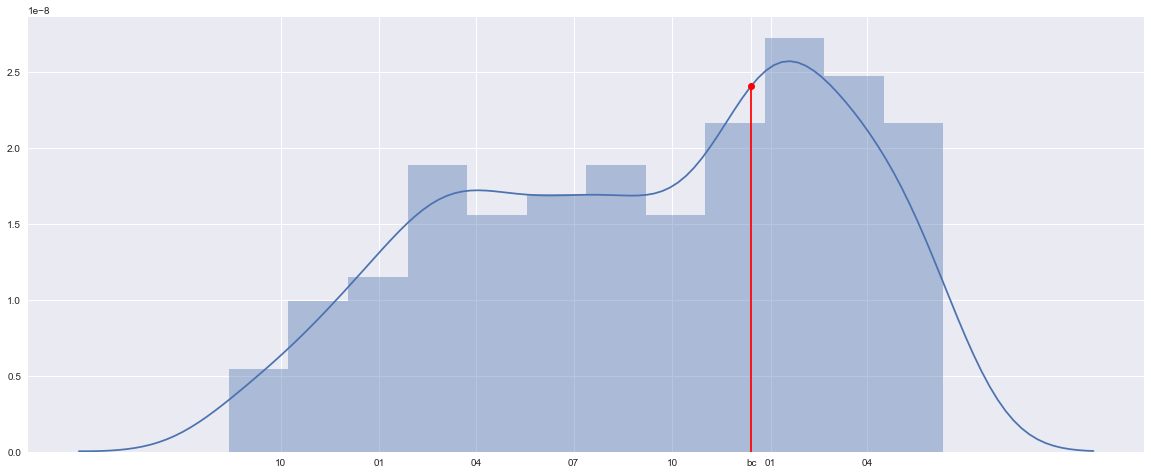

ichie
2015-04-19 15:02:34+00:00
2017-06-11 03:00:16+00:00
2016-03-23 00:00:00


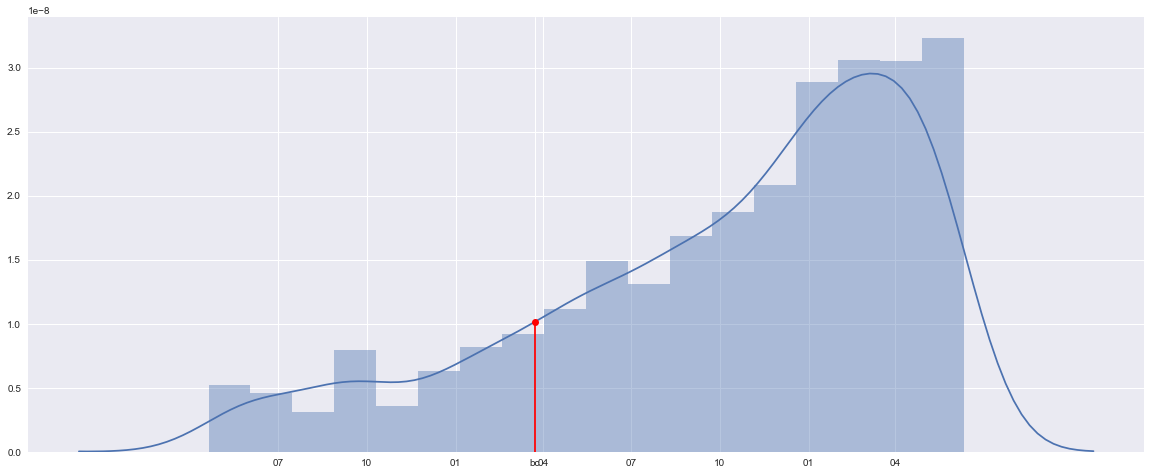

lehoi
2014-10-02 20:52:34+00:00
2017-06-11 13:23:19+00:00
2016-09-28 00:00:00


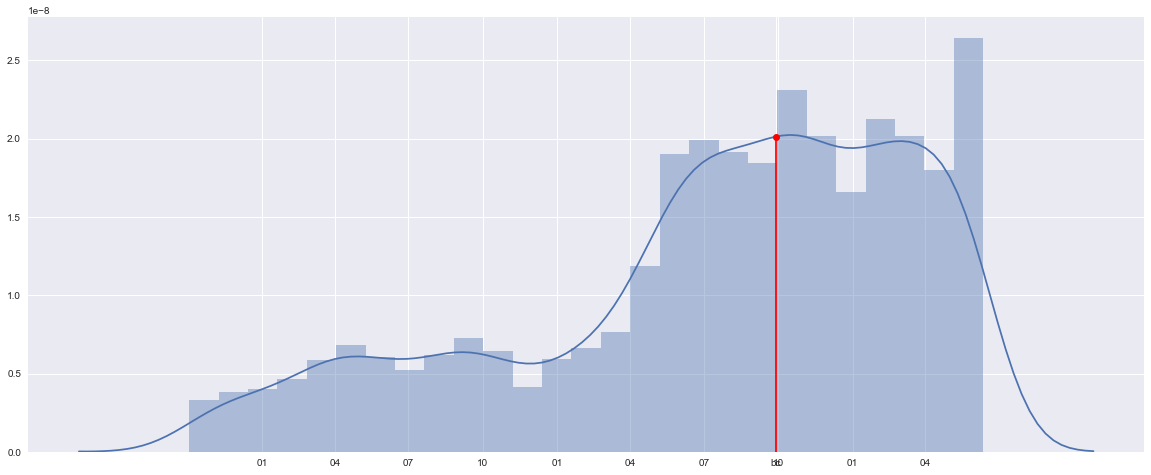

uijeongbu
2011-06-14 15:39:41+00:00
2017-06-11 16:39:49+00:00
2017-01-11 00:00:00


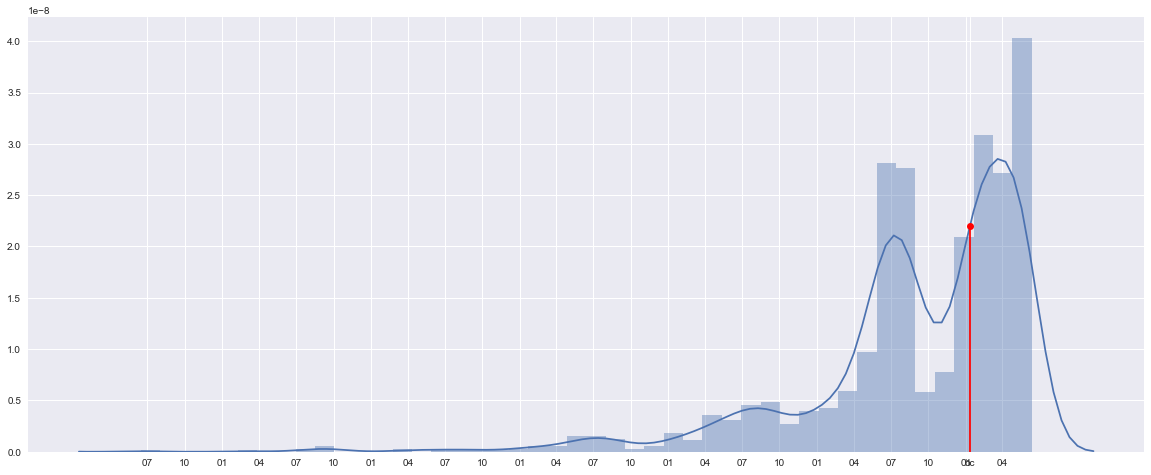

csdinoa
2014-11-02 14:29:39+00:00
2017-06-09 11:04:28+00:00
2017-01-11 00:00:00


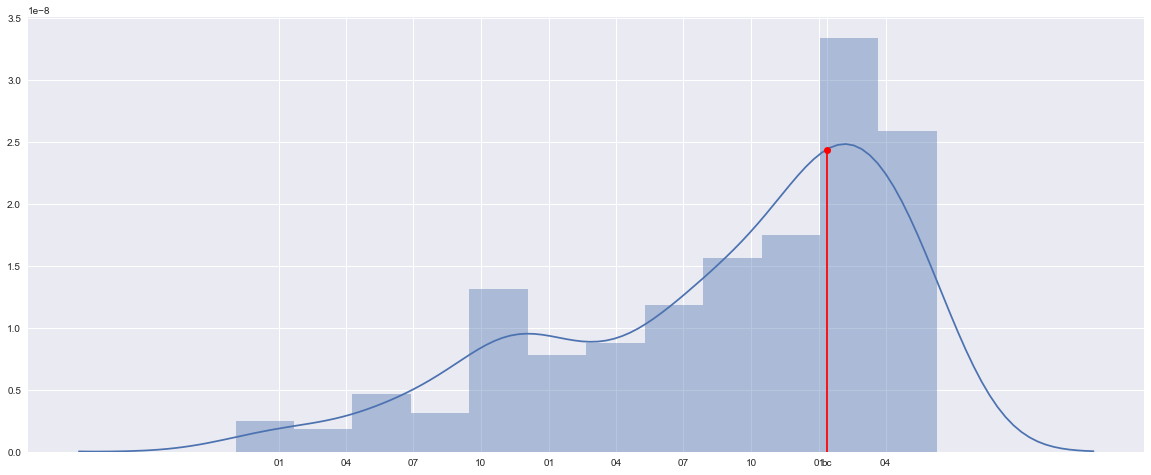

pildong
2010-12-10 20:35:11+00:00
2017-06-10 22:20:08+00:00
2016-06-01 00:00:00


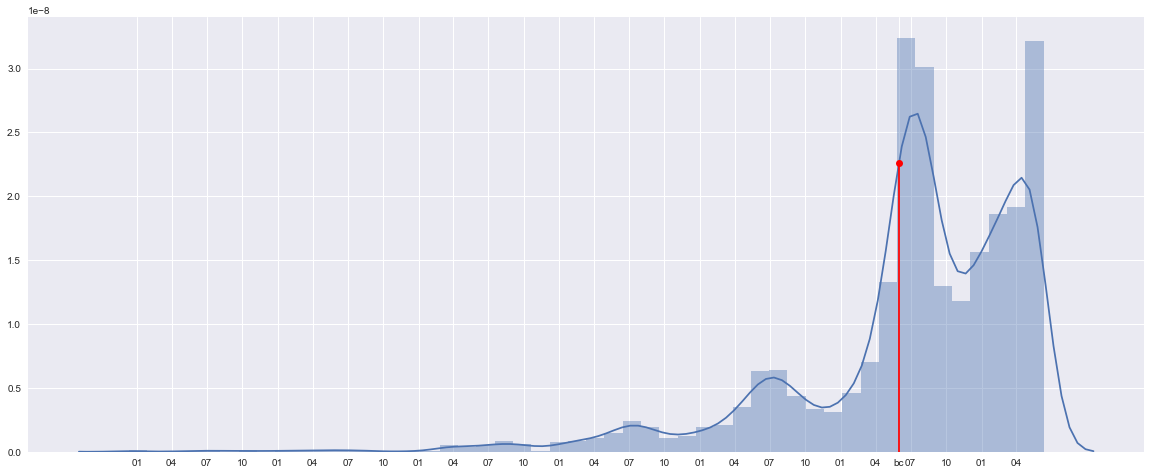

jinospizza
2015-11-04 01:12:39+00:00
2017-06-10 21:46:54+00:00
2016-08-10 00:00:00


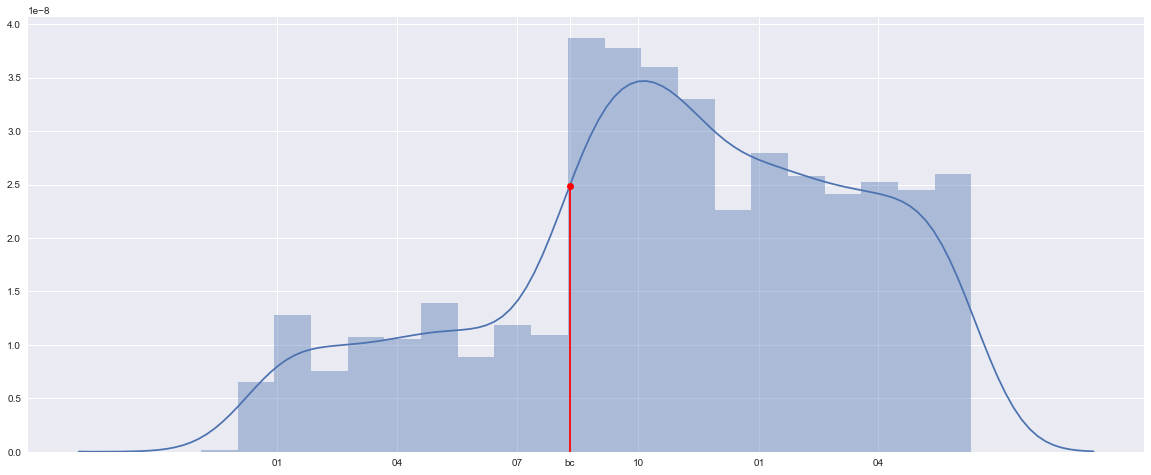

jinjin
2015-07-15 19:49:13+00:00
2017-06-11 17:40:46+00:00
2016-03-16 00:00:00


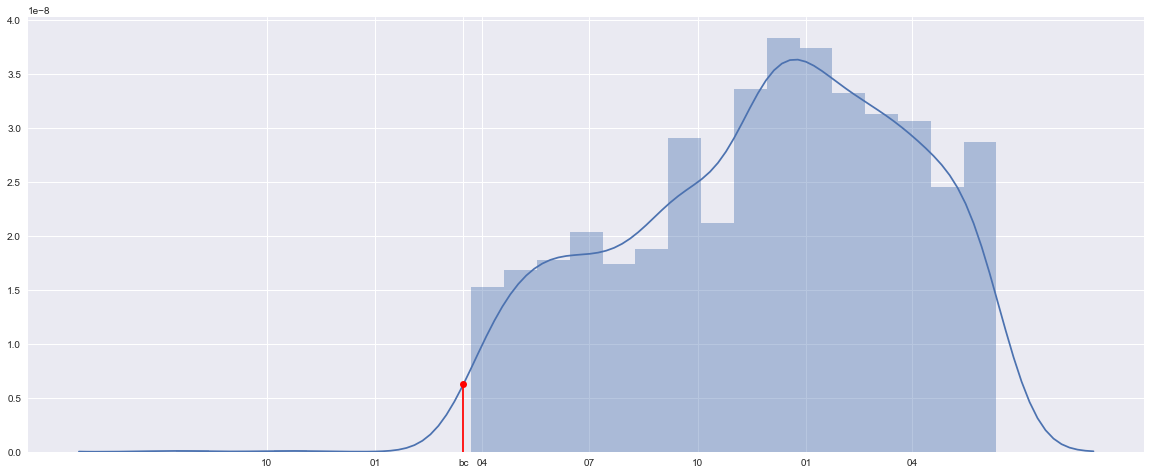

modak
2015-02-05 12:47:10+00:00
2017-06-07 12:25:21+00:00
2016-06-29 00:00:00


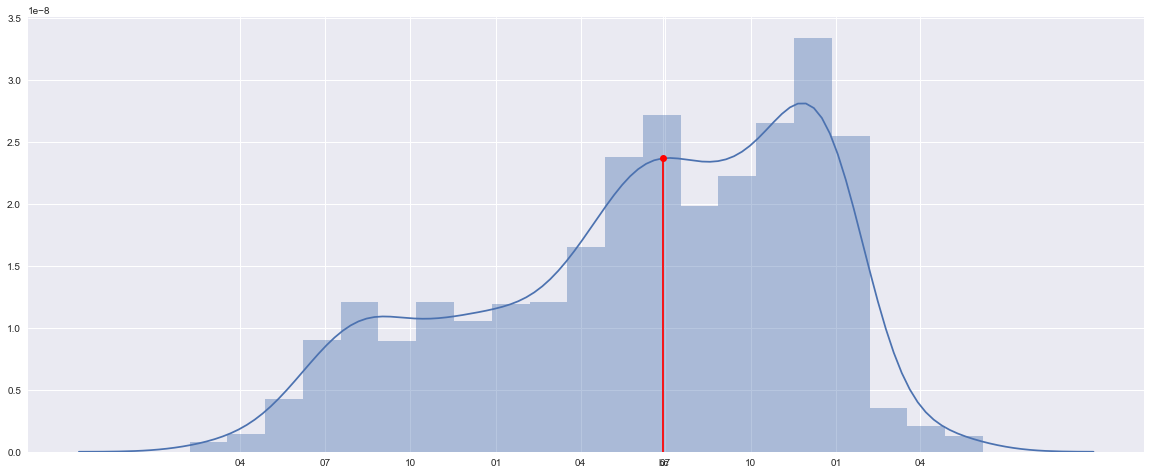

downtwnr
2016-03-01 12:44:27+00:00
2017-06-11 19:34:33+00:00
2017-05-24 00:00:00


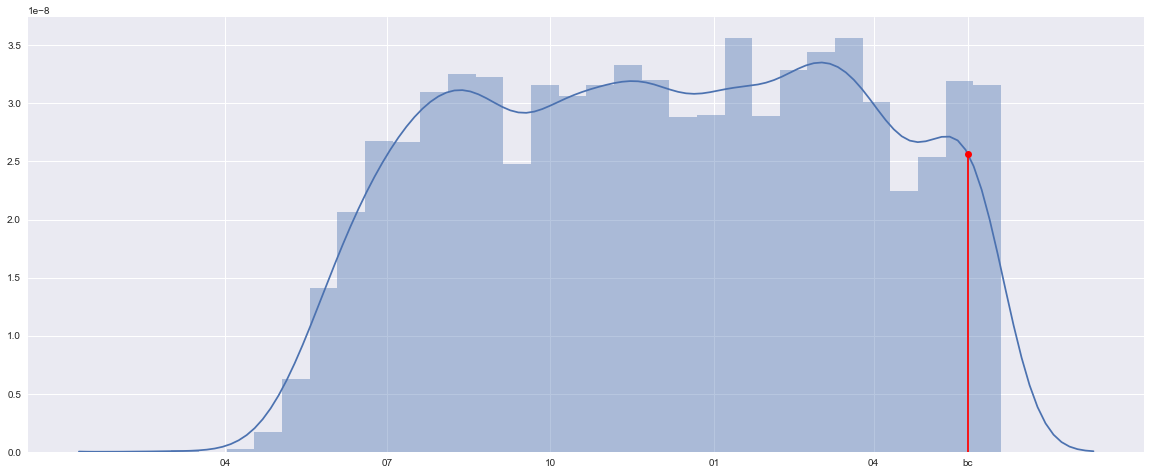

soiyn
2014-07-31 21:41:47+00:00
2017-06-12 06:58:24+00:00
2016-09-28 00:00:00


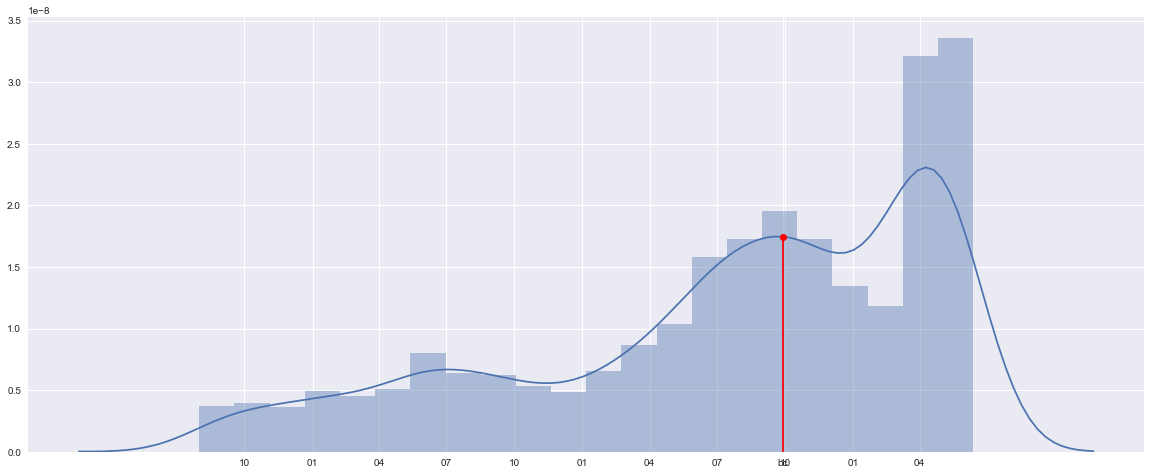

coochullo
2015-06-07 00:20:34+00:00
2017-06-10 13:13:34+00:00
2016-09-21 00:00:00


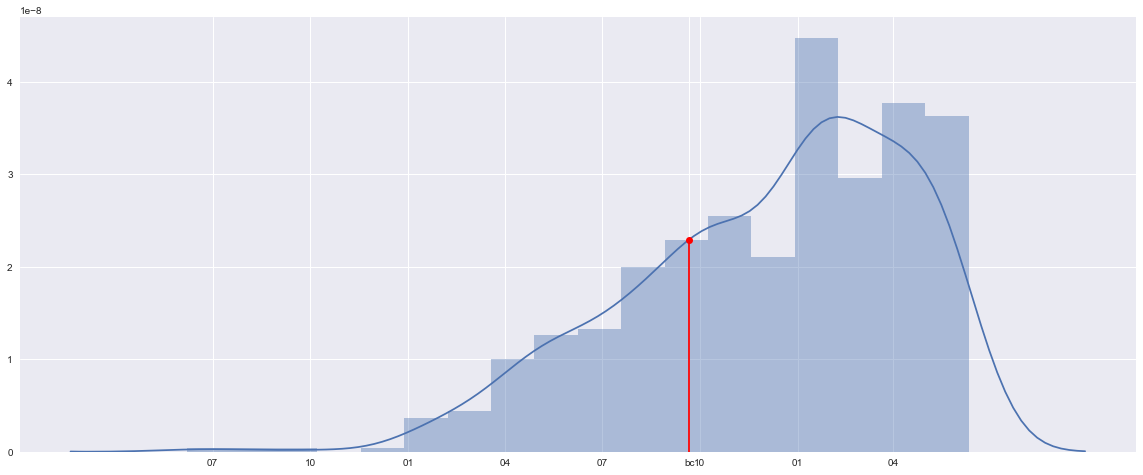

monro
2014-10-03 18:17:52+00:00
2017-06-12 01:27:22+00:00
2016-01-20 00:00:00


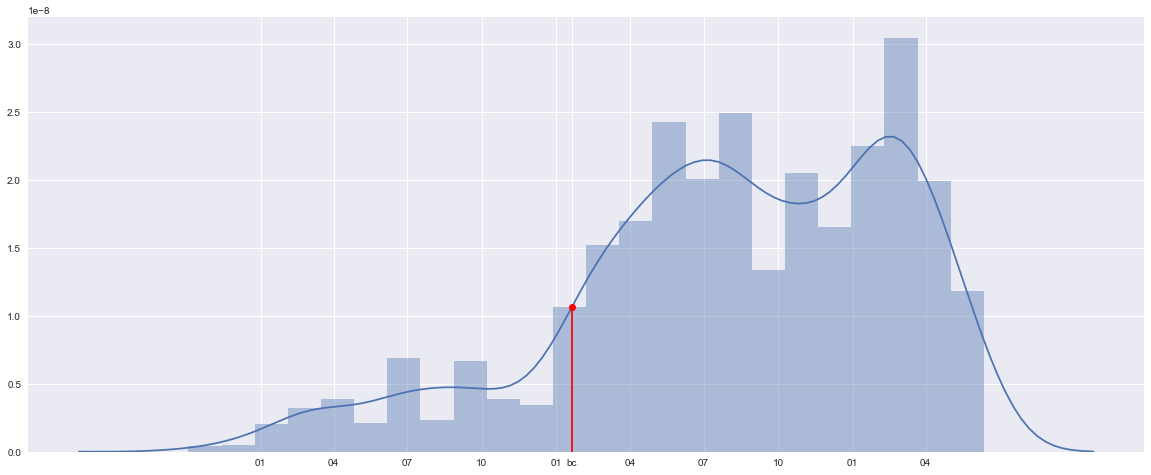

gpaki
2014-12-20 09:18:46+00:00
2017-06-11 01:12:05+00:00
2016-03-23 00:00:00


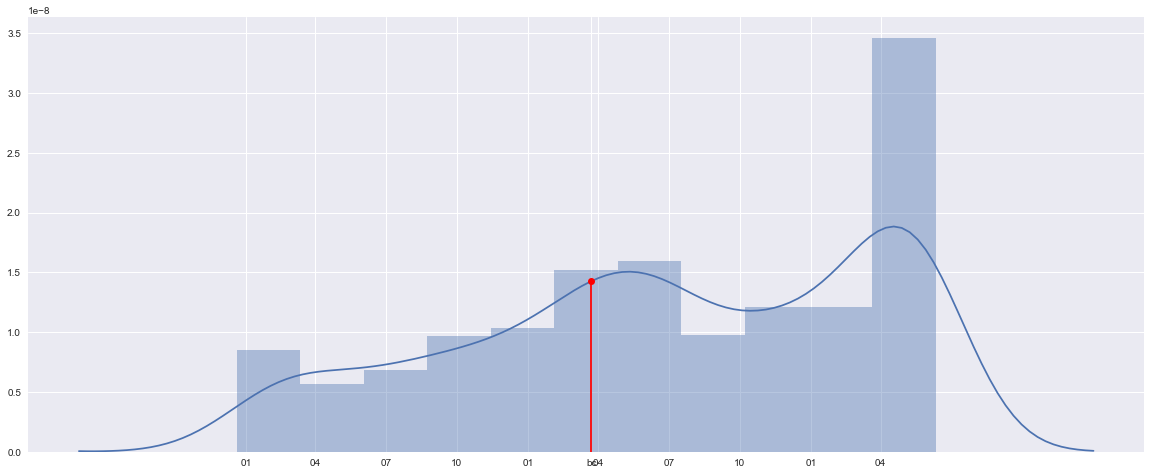

hadonggwang
2011-08-31 15:44:22+00:00
2017-06-11 16:03:20+00:00
2016-11-16 00:00:00


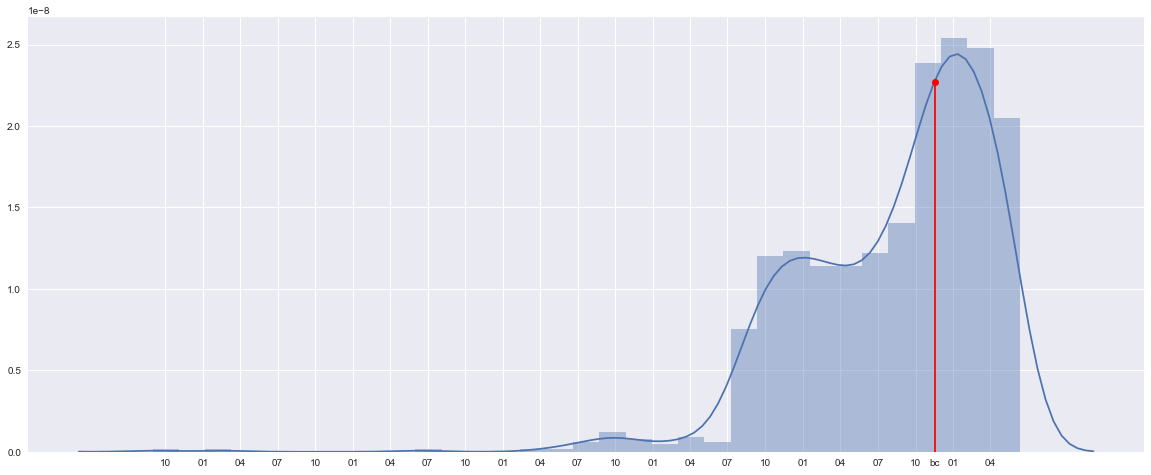

iamburger
2011-03-25 14:49:53+00:00
2017-06-11 18:06:18+00:00
2015-05-13 00:00:00


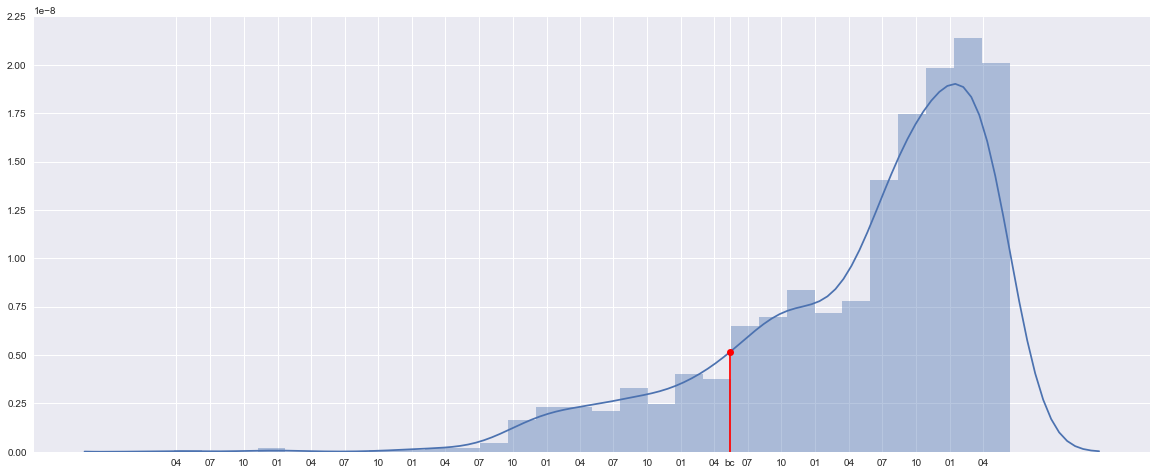

In [28]:
for key in data_dic.keys():
    print(key)
    print(data_dic[key]['datetime'].min())
    print(data_dic[key]['datetime'].max())
    print(bc_time[key])
    graph(data_dic[key], bc_time[key])

In [16]:
# column에 잘 추가가 됐는지 확인
data_ichie.columns

Index([u'uid', u'datetime', u'likes', u'location', u'account', u'tags',
       u'comments', u'number of tags', u'suyo'],
      dtype='object')

In [17]:
# 항목별로 몇개 있나 확인 
# int_maker가 잘 작동됐으면 float('nan')으로 표시되던 항이 0으로 바뀌면서 항목 수가 uid의 항목 수와 같아졌을 것이다.
data_ichie.count()

uid               1665
datetime          1665
likes             1665
location          1665
account           1665
tags              1246
comments          1636
number of tags    1665
suyo              1665
dtype: int64

In [18]:
# 그냥 해본 것
data_ichie['likes'].describe()

count     1665
unique     235
top         17
freq        38
Name: likes, dtype: int64

In [19]:
# 그냥 해본 것 2
data_ichie['suyo'].describe()

count     1665
unique       5
top          0
freq      1446
Name: suyo, dtype: int64

In [20]:
# 그냥 해본 것 3
data_ichie['tags'].describe()

count        1246
unique       1096
top       #아이엠어버거
freq           44
Name: tags, dtype: object

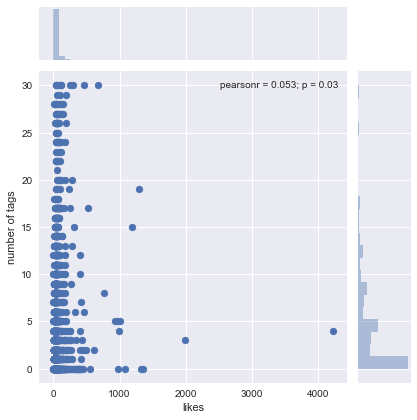

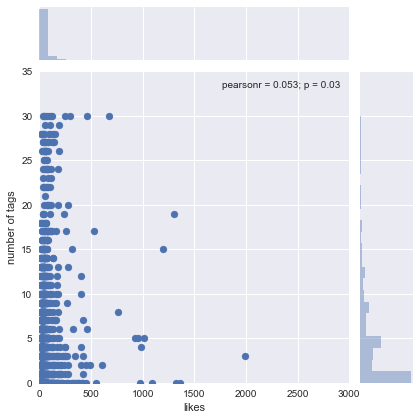

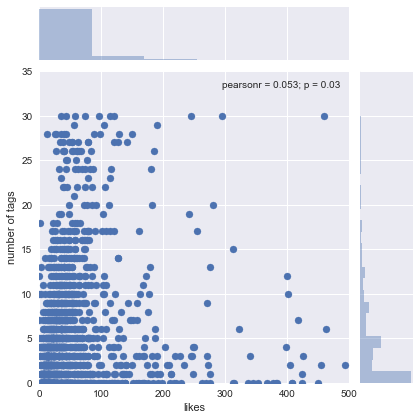

In [21]:
# 테그수와 like수 상관관계 시각화
a = sns.jointplot(x='likes', y='number of tags', data=data_ichie)
b = sns.jointplot(x='likes', y='number of tags', data=data_ichie, xlim=(0, 3000), ylim=(0, 35))
c = sns.jointplot(x='likes', y='number of tags', data=data_ichie, xlim=(0, 500), ylim=(0, 35))
plt.show()

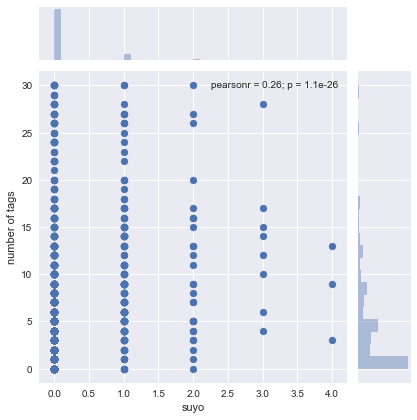

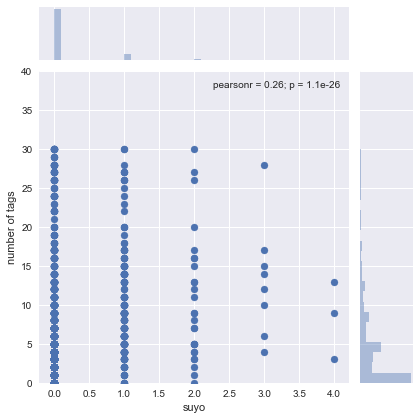

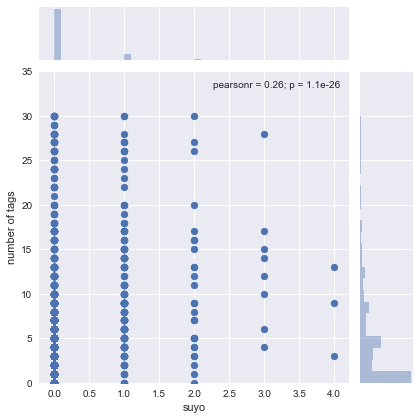

In [22]:
# 테그수와 수요미식회수 상관관계 시각화
a = sns.jointplot(x='suyo', y='number of tags', data=data_ichie)
b = sns.jointplot(x='suyo', y='number of tags', data=data_ichie, ylim=(0, 40))
c = sns.jointplot(x='suyo', y='number of tags', data=data_ichie, ylim=(0, 35))
plt.show()

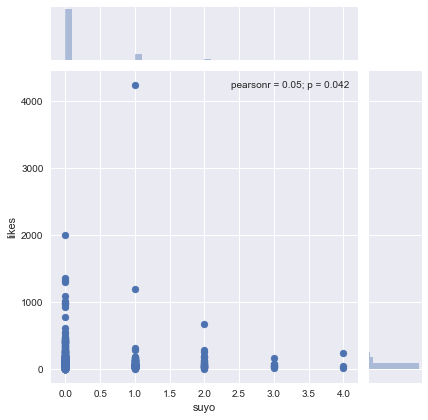

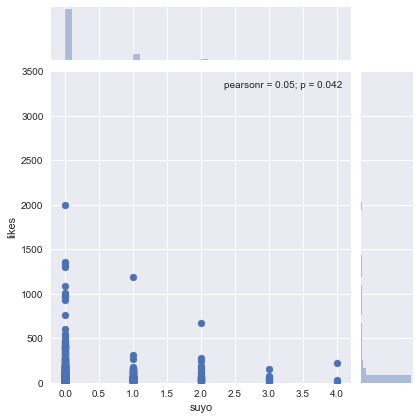

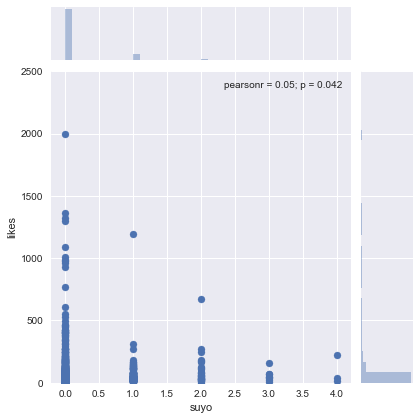

In [23]:
# like수와 수요미식회수 상관관계 시각화
a = sns.jointplot(x='suyo', y='likes', data=data_ichie)
b = sns.jointplot(x='suyo', y='likes', data=data_ichie, ylim=(0, 3500))
c = sns.jointplot(x='suyo', y='likes', data=data_ichie, ylim=(0, 2500))
plt.show()

In [35]:
# 많이 언급된 테그 출력
vdic = tag_analyze(data_ichie)
voc_df = pd.Series(vdic)
voc_df.sort_values().tail(20)

먹방           37.0
카르파치오        40.0
트러플          44.0
daily        47.0
수요미식회        51.0
pasta        52.0
쿠촐로오스테리아     61.0
일상           63.0
이태원맛집        64.0
와인           69.0
트러플파스타       70.0
cucciolo     77.0
맛집           79.0
맛스타그램        98.0
파스타          99.0
해방촌맛집       101.0
먹스타그램       119.0
이태원         212.0
해방촌         343.0
쿠촐로         523.0
dtype: float64

In [36]:
# 테그:빈도수 사전을 json 파일로 저장
json_maker(f_name, data_ichie)

In [26]:
# json 파일 호출(사전)
json_open(f_name)

{u'\uce58\uc988\uce58\uc988': 1.0,
 u'realburger': 1.0,
 u'goodfood': 2.0,
 u'\u661f\u671f\u4e09': 1.0,
 u'yellow': 2.0,
 u'\uba39\uc2a4\ud0c0\ub9ac\uc758\ucd94\ucc9c\ub9db\uc9d1': 2.0,
 u'\uad6c\uc6b4\uc5b4\ub2c8\uc5b8': 1.0,
 u'\ud64d\ub300\ud56b\ud50c': 1.0,
 u'cafestagram': 1.0,
 u'5500\uc6d0': 1.0,
 u'\ub09c\ubc84\uac70\ud30c\uc774\ud130\ub2e4': 1.0,
 u'analogfilm': 1.0,
 u'\ub0a8\uc790\ub370\uc77c\ub9ac\ub8e9': 1.0,
 u'\u65e5\u672c\u4eba': 1.0,
 u'\ubc88\uc744\ube14\ub799\uc73c\ub85c\uc2dc\ucf1c\uc57c\ud558\ub294\ub370': 1.0,
 u'\uc624\ubcf5\ud131': 1.0,
 u'sorry': 1.0,
 u'\ubc14\ub2d0\ub77c\uc250\uc774\ud06c': 4.0,
 u'americancuisine': 1.0,
 u'\ud55c\ub0a8\ub3d9\ub9db\uc9d1': 6.0,
 u'\u7d50\u679c\u306b\u30b3\u30df\u30c3\u30c8': 1.0,
 u'\ud55c\ub0a8\ub3d9\ub514\ubba4\uc9c0\uc5c4': 1.0,
 u'\uc5d8\ub808\ub098\ub9d8\uacfc': 1.0,
 u'\ub178\ub178\ub178': 1.0,
 u'doublecheese': 2.0,
 u'itstoogood': 1.0,
 u'\ub098\ub3c4': 1.0,
 u'\uc218\uc81c': 1.0,
 u'meandyouandeveryone': 2.0,
 u'\uc1

In [89]:
dfdf.columns.name = ['shop']

In [105]:
dfdf.stack().sort_values(ascending=False)

0  진진             1495.0
   멘보샤             819.0
   먹스타그램           474.0
   서교동             369.0
   맛스타그램           348.0
   맛집              259.0
   미슐랭             211.0
   중식              201.0
   대게살볶음           199.0
   서교동맛집           188.0
   수요미식회           182.0
   미슐랭1스타          159.0
   어향가지            152.0
   일상              148.0
   chinesefood     126.0
   먹방              123.0
   서교동진진           104.0
   연남동             104.0
   food            103.0
   홍대              101.0
   중화요리            100.0
   망원동              98.0
   중식당              96.0
   깐쇼새우             84.0
   michelin         83.0
   foodstagram      82.0
   daily            82.0
   마파두부             82.0
   foodie           80.0
   홍대맛집             78.0
                   ...  
   스타셰프              1.0
   시작                1.0
   스위치               1.0
   스승의은혜는하늘같아서       1.0
   스승님               1.0
   스벅                1.0
   스몰웨딩              1.0
   스모어               1.0
   술한잔맛집             1.0


In [116]:
#temp_list = []
for key in j3.keys():
    voc_sr = pd.Series(j3[key][0])
    voc_df = pd.DataFrame(voc_sr.sort_values(ascending=False))
    #temp_list.append(voc_df)
    print('')
    print((voc_df.iloc[:20]))
#voc_df.iloc[10:20]
#dfdf = pd.concat(temp_list, axis=1)


             0
평양냉면     893.0
평양면옥     822.0
의정부      442.0
의정부평양면옥  442.0
냉면       297.0
먹스타그램    280.0
맛스타그램    231.0
수요미식회    191.0
제육       183.0
의정부맛집    172.0
맛집       140.0
물냉면       85.0
일상        77.0
평냉        67.0
수육        61.0
먹방        52.0
food      48.0
만두        48.0
daily     40.0
냉면맛집      39.0

                0
아이엠어버거      717.0
iamaburger  484.0
홍대          464.0
수제버거        339.0
먹스타그램       317.0
burger      204.0
홍대맛집        191.0
맛스타그램       171.0
수요미식회       156.0
햄버거         149.0
맛집          107.0
일상           98.0
daily        90.0
instafood    81.0
버거           80.0
어니언쉬림프버거     77.0
hamburger    75.0
hongdae      72.0
데일리          72.0
seoul        71.0

             0
레호이     3586.0
이태원     1489.0
반미      1407.0
쌀국수     1247.0
lehoi   1244.0
소월길     1020.0
먹스타그램    976.0
경리단길     876.0
분짜       667.0
맛집       597.0
베트남음식    543.0
맛스타그램    502.0
이태원맛집    470.0
일상       409.0
베트남      358.0
반미샌드위치   343.0
pho      271.0
수요미식회    265.0
daily    258.0
bunc

In [106]:
j3.keys()

[u'uijeongbu',
 u'iamburger',
 u'lehoi',
 u'sushi',
 u'csdinoa',
 u'pildong',
 u'jinospizza',
 u'jinjin',
 u'modak',
 u'downtwnr',
 u'soiyn',
 u'gpaki',
 u'monro',
 u'ichie',
 u'hadonggwang',
 u'coochullo']

In [108]:
voc_sr = pd.Series(j3['jinospizza'][0])
#voc_sr.name = 'freq'
#voc_sr.index.name = 'name'
voc_df = pd.DataFrame(voc_sr.sort_values(ascending=False))

writer = pd.ExcelWriter('output.xlsx')
voc_df.to_excel(writer,'Sheet1')
writer.save()

In [309]:
len(j3['hadonggwang'][0].keys())

1900

In [118]:
j3['jinjin'][0]['수요미식회']

KeyError: '\xec\x88\x98\xec\x9a\x94\xeb\xaf\xb8\xec\x8b\x9d\xed\x9a\x8c'

In [119]:
j3['jinjin'][0].keys()

[u'goexplore',
 u'\ub9e8\ubcf4\uc0e4',
 u'\ub9db\uc9d1\ud22c\uc5b4\uc131\uacf5\uc801',
 u'\uc778\uc2a4\ud0c0\uc0ac\uc9c4',
 u'\uc0c9\uac10',
 u'goodfood',
 u'\uc804\ub300',
 u'3\ub9cc8000\uc6d0',
 u'2016\ub144\ub3c42\ud559\uae30',
 u'\uacfc\uc2dd\uc7bc',
 u'\u7c73\u5176\u6797\u7f8e\u98df',
 u'shuijingfang',
 u'happybirthday',
 u'\u91b8\u3057\u4eba\u4e5d\u5e73\u6b21',
 u'\uc218\uc6d0\ub9c8\uce74\ub871',
 u'\u5915\u3054\u98ef',
 u'\uc548\uc601\ubbf8',
 u'\uccad\ub2f4',
 u'\uc5f4\uc2ec\ud788_\uba39\uace0\uc788\uc5b4\uc694',
 u'\uc9c4\uc9c4\uc0ac\ub791',
 u'\uc9c4\uc9c4\uac00\uc5f0',
 u'\uc138\uc0c1\uc2e0\ub0a8',
 u'\uc5ec\uae30\uac00\ub354\uc911\uad6d\uac19\uad6c\ub098',
 u'\ub9e5\uc8fc\uc548\uc8fc\ub85c\ub294\ub531',
 u'\ub300\uac8c\uc0b4\ubcf6\uc74c\ub3c4\ub9db\uc788\ub2e4',
 u'\ubaa8\ub450\ud654\uc774\ud305',
 u'\uc555\uad6c\uc815\uc784\uc170\ud504',
 u'\ub9dd\uc6d0\ub3d9\uc5ec\ud589',
 u'\uc0dd\ud30c',
 u'\ud0d5\uc218\uc721\uc774\uba39\uace0\uc2f6\uc5c8\ub294\ub370',
 u'\ud55c\uad6d\u

In [84]:
for key, dt in data_dic.items():
    a = j3[key][0].values()
    print('%s, %0.2f %%'%(key, (dt['suyo'].count() / sum(a)) * 100))
    #print('%s, %0.2f %%,    (%s : %s)'%(key, (dt['suyo'].count() / sum(a)) * 100, dt['suyo'].count(), sum(a)))

sushi, 13.79 %
ichie, 15.30 %
lehoi, 15.07 %
uijeongbu, 19.58 %
csdinoa, 13.04 %
pildong, 20.37 %
jinospizza, 12.45 %
jinjin, 13.71 %
modak, 15.50 %
downtwnr, 14.74 %
soiyn, 16.49 %
coochullo, 13.99 %
monro, 18.82 %
gpaki, 14.73 %
hadonggwang, 16.75 %
iamburger, 19.02 %


In [ ]:
for key in j3.keys():
    a = j3[key][0].values()
    1 / sum(a)
    print(j3[key][0])

In [103]:
data_dic['jinjin'].pivot_table('weekday', 'hour')

DataError: No numeric types to aggregate